In [3]:
import pandas as pd
import re

# Load the CSV file (Ensure it's in the same directory as the notebook)
file_path = "IPL_Match_Highlights_Commentary.csv"  
df = pd.read_csv(file_path)

# Function to extract details using regex
def extract_details(commentary):
    # Extract bowler and batter names
    bowler_pattern = r"^([\w\s]+)\s+to\s+([\w\s]+),"
    ball_type_pattern = r"(full toss|bouncer|yorker|good length|short ball)"
    speed_pattern = r"(\d{3})\s*kph"  # Assuming speed is in kph format
    shot_type_pattern = r"(FOUR|SIX|single|double|triple)"

    bowler, batter, ball_type, speed, shot_type = None, None, None, None, None

    # Extract bowler and batter names
    match = re.search(bowler_pattern, commentary)
    if match:
        bowler = match.group(1).strip()  # Extract the bowler name
        batter = match.group(2).strip()  # Extract the batter name

    # Extract ball type (if mentioned)
    ball_match = re.search(ball_type_pattern, commentary, re.IGNORECASE)
    if ball_match:
        ball_type = ball_match.group(0).strip()

    # Extract ball speed (if mentioned)
    speed_match = re.search(speed_pattern, commentary)
    if speed_match:
        speed = speed_match.group(0).strip()

    # Extract shot type (if mentioned)
    shot_match = re.search(shot_type_pattern, commentary, re.IGNORECASE)
    if shot_match:
        shot_type = shot_match.group(0).strip()

    return pd.Series([bowler, batter, ball_type, shot_type, speed])

# Apply the function to extract new columns
df[['Bowler Name', 'Batter Name', 'Ball Type', 'Shot Type', 'Speed of Ball']] = df['Commentary'].apply(extract_details)

# Extract Runs Scored
df['Runs Scored'] = df['score'].apply(lambda x: 4 if 'FOUR' in str(x) else (6 if 'SIX' in str(x) else 0))

# Save the updated dataset
df.to_csv("Updated_IPL_Commentary.csv", index=False)

# Display the first few rows
df.head()


,Match_id,Team,Over_num,Commentary,batsman,score,Bowler Name,Batter Name,Ball Type,Shot Type,Speed of Ball,Runs Scored
0,4281444,RCB 1st Inns,0.5,"Nehra to Mandeep, FOUR, first boundary for Man...",Nehra to Mandeep,FOUR,Nehra,Mandeep,None,FOUR,None,4
1,4281444,RCB 1st Inns,1.0,"Nehra to Mandeep, FOUR, back-to-back boundarie...",Nehra to Mandeep,FOUR,Nehra,Mandeep,None,FOUR,None,4
2,4281444,RCB 1st Inns,10.0,"Henriques to Kedar Jadhav, FOUR, hit straight ...",Henriques to Kedar Jadhav,FOUR,Henriques,Kedar Jadhav,None,FOUR,None,4
3,4281444,RCB 1st Inns,10.4,"Nehra to Kedar Jadhav, FOUR, another full toss...",Nehra to Kedar Jadhav,FOUR,Nehra,Kedar Jadhav,full toss,FOUR,None,4
4,4281444,RCB 1st Inns,10.5,"Nehra to Kedar Jadhav, FOUR, four more. Jadhav...",Nehra to Kedar Jadhav,FOUR,Nehra,Kedar Jadhav,None,FOUR,None,4


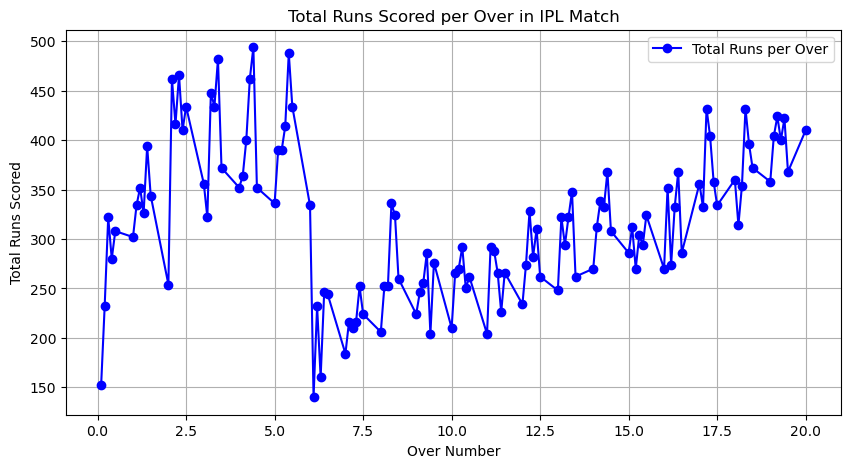

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "IPL_Match_Highlights_Commentary.csv"  
df = pd.read_csv(file_path)

# Extract Runs Scored from "score" column
df['Runs Scored'] = df['score'].apply(lambda x: 4 if 'FOUR' in str(x) else (6 if 'SIX' in str(x) else 0))

# Convert Over Number to numeric
df['Over_num'] = pd.to_numeric(df['Over_num'])

# Aggregate total runs per over
runs_per_over = df.groupby('Over_num')['Runs Scored'].sum().reset_index()

# Plot the line chart
plt.figure(figsize=(10, 5))
plt.plot(runs_per_over['Over_num'], runs_per_over['Runs Scored'], marker='o', linestyle='-', color='b', label="Total Runs per Over")

# Chart Formatting
plt.xlabel("Over Number")
plt.ylabel("Total Runs Scored")
plt.title("Total Runs Scored per Over in IPL Match")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
